<a href="https://colab.research.google.com/github/chanyoung98/predicting_the_transfer_fee_of_soccer_player/blob/main/fc203_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 축구선수 이적료 예측 모델링

#### 팀 FC203 [응용통계학과 김찬영, 김청환, 이현석]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/통계최강자전/'
df17 = pd.read_csv(PATH + 'transfermarkt_fbref_201718.csv', sep=';')
df18 = pd.read_csv(PATH + 'transfermarkt_fbref_201819.csv', sep=';')
df19 = pd.read_csv(PATH + 'transfermarkt_fbref_201920.csv', sep=';')
df17.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (395) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,...,own_goals_against_gkm,psxg_gkm,psnpxg_per_shot_on_target_againstm,psxg_net_gkm,psxg_net_per90_gkm,passes_completed_launched_gkm,passes_launched_gkm,passes_pct_launched_gkm,passes_gkm,passes_throws_gkm,pct_passes_launched_gkm,passes_length_avg_gkm,goal_kicksm,pct_goal_kicks_launchedm,goal_kick_length_avgm,crosses_gkm,crosses_stopped_gkm,crosses_stopped_pct_gkm,def_actions_outside_pen_area_gkm,def_actions_outside_pen_area_per90_gkm,avg_distance_def_actions_gkm,LgRk,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,La Liga,23,12,1037,1,1,0,0,1,0,0.09,0.09,0.17,0.09,0.17,0.9,0.9,1.7,0.08,0.15,0.23,0.08,0.23,11.5,14,4,1,28.6,1.22,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14,38,15,2,21,40,50,-10,47,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,La Liga,27,27,2320,0,1,0,0,3,0,0.00,0.04,0.04,0.00,0.04,0.9,0.9,0.9,0.04,0.04,0.07,0.04,0.07,25.8,10,2,0,20.0,0.39,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,38,22,10,6,94,44,50,76,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,La Liga,24,24,2138,0,2,0,0,9,2,0.00,0.08,0.08,0.00,0.08,0.5,0.5,1.6,0.02,0.07,0.09,0.02,0.09,23.8,8,1,0,12.5,0.34,...,0.0,0.020175,0.000094,0.0,0.0,0.097368,0.322515,0.00883,0.254094,0.014327,0.026433,0.018012,0.093275,0.029064,0.020643,0.087427,0.006433,0.002164,0.011111,0.000292,0.004737,14,38,15,2,21,40,50,-10,47,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


## Data preprocessing

In [ ]:
# Processing missing values for each season's data
df17 = df17.fillna(0)
df17 = df17[df17.foot!=0]
df18.dropna(axis=0, inplace=True)
df19['CLBestScorer'] = df19['CLBestScorer'].fillna(0)
df19.dropna(axis=0, inplace=True)

# Changing column name('Unnamed: 0') / Data merging
df17.rename(columns={'Unnamed: 0':'Column1'}, inplace=True)
df0 = pd.concat([df17, df18])
df1 = pd.concat([df0, df19])
df1.tail()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,...,own_goals_against_gkm,psxg_gkm,psnpxg_per_shot_on_target_againstm,psxg_net_gkm,psxg_net_per90_gkm,passes_completed_launched_gkm,passes_launched_gkm,passes_pct_launched_gkm,passes_gkm,passes_throws_gkm,pct_passes_launched_gkm,passes_length_avg_gkm,goal_kicksm,pct_goal_kicks_launchedm,goal_kick_length_avgm,crosses_gkm,crosses_stopped_gkm,crosses_stopped_pct_gkm,def_actions_outside_pen_area_gkm,def_actions_outside_pen_area_per90_gkm,avg_distance_def_actions_gkm,LgRk,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
2639,1997.0,Daniel Podence,pt POR,"FW,MF",Wolves,23.0,1995.0,12000000.0,165.0,Forward - Right Winger,right,Premier League,9.0,3.0,289.0,1.0,0.0,0.0,0.0,0.0,0.0,0.31,0.00,0.31,0.31,0.31,1.6,1.6,0.4,0.49,0.13,0.62,0.49,0.62,3.2,10.0,4.0,0.0,40.0,3.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2640,2202.0,Romain SaĂŻss,ma MAR,DF,Wolves,29.0,1990.0,4000000.0,188.0,Defender - Centre-Back,left,Premier League,33.0,31.0,2705.0,2.0,1.0,0.0,0.0,12.0,1.0,0.07,0.03,0.10,0.07,0.10,2.7,2.7,0.5,0.09,0.02,0.11,0.09,0.11,30.1,23.0,8.0,1.0,34.8,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2641,2523.0,Adama TraorĂ©,es ESP,"FW,MF",Wolves,23.0,1996.0,25000000.0,178.0,Forward - Right Winger,right,Premier League,37.0,27.0,2605.0,4.0,9.0,0.0,0.0,1.0,0.0,0.14,0.31,0.45,0.14,0.45,3.5,3.5,6.7,0.12,0.23,0.35,0.12,0.35,11.2,17.0,4.0,7.0,23.5,1.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2642,2567.0,JesĂşs Vallejo,es ESP,DF,Wolves,22.0,1997.0,6000000.0,184.0,Defender - Centre-Back,right,Premier League,2.0,1.0,163.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.8,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2643,2615.0,RĂşben Vinagre,pt POR,DF,Wolves,20.0,1999.0,9000000.0,174.0,Defender - Left-Back,left,Premier League,16.0,6.0,652.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.3,0.3,0.5,0.05,0.07,0.12,0.05,0.12,7.2,5.0,0.0,0.0,0.0,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#


In [ ]:
# Identifying duplicated rows
duplicated_data = df1[df1.duplicated()]
duplicated_data = duplicated_data.dropna()
duplicated_data

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,...,own_goals_against_gkm,psxg_gkm,psnpxg_per_shot_on_target_againstm,psxg_net_gkm,psxg_net_per90_gkm,passes_completed_launched_gkm,passes_launched_gkm,passes_pct_launched_gkm,passes_gkm,passes_throws_gkm,pct_passes_launched_gkm,passes_length_avg_gkm,goal_kicksm,pct_goal_kicks_launchedm,goal_kick_length_avgm,crosses_gkm,crosses_stopped_gkm,crosses_stopped_pct_gkm,def_actions_outside_pen_area_gkm,def_actions_outside_pen_area_per90_gkm,avg_distance_def_actions_gkm,LgRk,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season


In [ ]:
# Index reset
df1.reset_index(drop=True, inplace=True)
df1.tail()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,...,own_goals_against_gkm,psxg_gkm,psnpxg_per_shot_on_target_againstm,psxg_net_gkm,psxg_net_per90_gkm,passes_completed_launched_gkm,passes_launched_gkm,passes_pct_launched_gkm,passes_gkm,passes_throws_gkm,pct_passes_launched_gkm,passes_length_avg_gkm,goal_kicksm,pct_goal_kicks_launchedm,goal_kick_length_avgm,crosses_gkm,crosses_stopped_gkm,crosses_stopped_pct_gkm,def_actions_outside_pen_area_gkm,def_actions_outside_pen_area_per90_gkm,avg_distance_def_actions_gkm,LgRk,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
6947,1997.0,Daniel Podence,pt POR,"FW,MF",Wolves,23.0,1995.0,12000000.0,165.0,Forward - Right Winger,right,Premier League,9.0,3.0,289.0,1.0,0.0,0.0,0.0,0.0,0.0,0.31,0.00,0.31,0.31,0.31,1.6,1.6,0.4,0.49,0.13,0.62,0.49,0.62,3.2,10.0,4.0,0.0,40.0,3.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6948,2202.0,Romain SaĂŻss,ma MAR,DF,Wolves,29.0,1990.0,4000000.0,188.0,Defender - Centre-Back,left,Premier League,33.0,31.0,2705.0,2.0,1.0,0.0,0.0,12.0,1.0,0.07,0.03,0.10,0.07,0.10,2.7,2.7,0.5,0.09,0.02,0.11,0.09,0.11,30.1,23.0,8.0,1.0,34.8,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6949,2523.0,Adama TraorĂ©,es ESP,"FW,MF",Wolves,23.0,1996.0,25000000.0,178.0,Forward - Right Winger,right,Premier League,37.0,27.0,2605.0,4.0,9.0,0.0,0.0,1.0,0.0,0.14,0.31,0.45,0.14,0.45,3.5,3.5,6.7,0.12,0.23,0.35,0.12,0.35,11.2,17.0,4.0,7.0,23.5,1.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6950,2567.0,JesĂşs Vallejo,es ESP,DF,Wolves,22.0,1997.0,6000000.0,184.0,Defender - Centre-Back,right,Premier League,2.0,1.0,163.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.8,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6951,2615.0,RĂşben Vinagre,pt POR,DF,Wolves,20.0,1999.0,9000000.0,174.0,Defender - Left-Back,left,Premier League,16.0,6.0,652.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.3,0.3,0.5,0.05,0.07,0.12,0.05,0.12,7.2,5.0,0.0,0.0,0.0,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#


In [ ]:
# Delete 'birth_year' column
df1.drop(columns=['birth_year'], axis=1, inplace=True)

# Fill zero data
df1.iloc[2218,5] = 19
df1.iloc[4738,5] = 17
df1.iloc[5024,5] = 20
df1.iloc[6452,5] = 17

df1.iloc[2218,2] = 'es ESP'

df1.iloc[2218,3] = 'DF'

df1.iloc[4494,7] = 183
df1.iloc[4738,7] = 178
df1.iloc[4836,7] = 182
df1.iloc[4841,7] = 176
df1.iloc[5189,7] = 179
df1.iloc[5454,7] = 181
df1.iloc[5488,7] = 188
df1.iloc[6439,7] = 178

# Reorganizing the values for 'position2'
df1['position2'].value_counts()

Defender - Centre-Back             1248
Forward - Centre-Forward            666
Midfielder - Central Midfield       659
Defender - Right-Back               593
Goalkeeper                          531
Defender - Left-Back                531
Midfielder - Defensive Midfield     366
Forward - Right Winger              337
attack - Centre-Forward             324
midfield - Central Midfield         313
Forward - Left Winger               309
Midfielder - Attacking Midfield     255
midfield - Defensive Midfield       183
attack - Left Winger                147
attack - Right Winger               142
midfield - Attacking Midfield       112
Forward - Second Striker             62
Midfielder - Left Midfield           55
Midfielder - Right Midfield          41
attack - Second Striker              34
midfield - Right Midfield            22
midfield - Left Midfield             21
Central Midfield                      1
Name: position2, dtype: int64

In [ ]:
df1['position2'] = df1['position2'].replace('attack - Centre-Forward','Forward - Centre-Forward')
df1['position2'] = df1['position2'].replace('attack - Left Winger','Forward - Left Winger')
df1['position2'] = df1['position2'].replace('attack - Right Winger','Forward - Right Winger')
df1['position2'] = df1['position2'].replace('attack - Second Striker','Forward - Second Striker')

df1['position2'] = df1['position2'].replace('Central Midfield','Midfielder - Central Midfield')
df1['position2'] = df1['position2'].replace('midfield - Central Midfield','Midfielder - Central Midfield')
df1['position2'] = df1['position2'].replace('midfield - Attacking Midfield','Midfielder - Attacking Midfield')
df1['position2'] = df1['position2'].replace('midfield - Defensive Midfield','Midfielder - Defensive Midfield')
df1['position2'] = df1['position2'].replace('midfield - Right Midfield','Midfielder - Right Midfield')
df1['position2'] = df1['position2'].replace('midfield - Left Midfield','Midfielder - Left Midfield')

df1['position2'].value_counts()

Defender - Centre-Back             1248
Forward - Centre-Forward            990
Midfielder - Central Midfield       973
Defender - Right-Back               593
Midfielder - Defensive Midfield     549
Defender - Left-Back                531
Goalkeeper                          531
Forward - Right Winger              479
Forward - Left Winger               456
Midfielder - Attacking Midfield     367
Forward - Second Striker             96
Midfielder - Left Midfield           76
Midfielder - Right Midfield          63
Name: position2, dtype: int64

In [ ]:
# Reorganizing the values for 'position'
df1['position'].value_counts()

DF       2087
MF       1412
FW        908
FW,MF     784
MF,FW     668
GK        524
DF,MF     314
MF,DF     152
DF,FW      56
FW,DF      46
GK,MF       1
Name: position, dtype: int64

In [ ]:
df1['position'] = df1['position'].replace('GK,MF','GK')
for i in range(0,len(df1)-1):
    if df1.iloc[i,8].startswith('Goalkeeper'):
        df1.iloc[i,3] = 'GK'
    elif df1.iloc[i,8].startswith('Defender'):
        df1.iloc[i,3] = 'DF'
    elif df1.iloc[i,8].startswith('Midfielder'):
        df1.iloc[i,3] = 'MF'
    elif df1.iloc[i,8].startswith('Forward'):
        df1.iloc[i,3] = 'FW'

df1['position'].value_counts()

DF    2372
MF    2028
FW    2021
GK     531
Name: position, dtype: int64

In [ ]:
# Delete the columns whose names with 'm' on the back
df1.drop(columns=list(df1)[197:380], axis=1, inplace=True)

# Delete the column 'Attendance'
df1.drop(columns=['Attendance'], axis=1, inplace=True)

# Organizing the order of columns
df1_1 = df1.columns[:11].tolist()
df1_2 = df1.columns[11:-4].tolist()
df1_3 = df1.columns[-4:].tolist()
col = df1_1 + df1_3 + df1_2
df1 = df1[col]
df1_1 = df1.columns[:5].tolist()
df1_2 = df1.columns[5:8].tolist()
df1_3 = df1.columns[8:15].tolist()
df1_4 = df1.columns[15:].tolist()
col = df1_1 + df1_3 + df1_2 + df1_4
df1 = df1[col]

# Delete the column 'Column1'
df1.drop(columns=['Column1'], axis=1, inplace=True)

In [ ]:
# Multiple columns label encoding

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
    def fit_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
        return output
from collections import defaultdict
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
    def fit_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
        return output

mcle = MultiColLabelEncoder()
df2 = mcle.fit_transform(df1, columns=['nationality','position','squad','position2','foot','league','Season'])
df2.head()

,player,nationality,position,squad,position2,foot,league,CL,WinCL,CLBestScorer,Season,age,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,...,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,LgRk,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90
0,Burgui,41,1,0,4,2,1,0.0,0.0,0.0,0,23.0,1800000.0,186.0,23.0,12.0,1037.0,1.0,1.0,0.0,0.0,1.0,0.0,0.09,0.09,0.17,0.09,0.17,0.9,0.9,1.7,0.08,0.15,0.23,0.08,0.23,11.5,14.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,15.0,2.0,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
1,Raphaël Varane,43,0,96,0,2,1,1.0,1.0,0.0,0,24.0,70000000.0,191.0,27.0,27.0,2320.0,0.0,1.0,0.0,0.0,3.0,0.0,0.00,0.04,0.04,0.00,0.04,0.9,0.9,0.9,0.04,0.04,0.07,0.04,0.07,25.8,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,38.0,22.0,10.0,6.0,94.0,44.0,50.0,76.0,2.00,83.3,45.4,37.9,1.00
2,Rubén Duarte,41,0,0,1,1,1,0.0,0.0,0.0,0,21.0,2000000.0,179.0,24.0,24.0,2138.0,0.0,2.0,0.0,0.0,9.0,2.0,0.00,0.08,0.08,0.00,0.08,0.5,0.5,1.6,0.02,0.07,0.09,0.02,0.09,23.8,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,15.0,2.0,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
3,Samuel Umtiti,43,0,11,0,1,1,1.0,0.0,0.0,0,23.0,60000000.0,182.0,25.0,24.0,2189.0,1.0,0.0,0.0,0.0,7.0,0.0,0.04,0.00,0.04,0.04,0.04,1.1,1.1,0.0,0.05,0.00,0.05,0.05,0.05,24.3,11.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,28.0,9.0,1.0,99.0,29.0,70.0,93.0,2.45,78.3,41.1,37.2,0.98
4,Manu García,41,3,0,10,1,1,0.0,0.0,0.0,0,31.0,1800000.0,183.0,30.0,27.0,2438.0,3.0,0.0,0.0,2.0,9.0,0.0,0.11,0.00,0.11,0.11,0.11,3.1,1.6,1.4,0.11,0.05,0.17,0.06,0.11,27.1,26.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,15.0,2.0,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37


In [ ]:
inverse_df2 = mcle.inverse_transform(df2, columns=['nationality','position','squad','position2','foot','league','Season'])
inverse_df2.head()

,player,nationality,position,squad,position2,foot,league,CL,WinCL,CLBestScorer,Season,age,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,...,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,LgRk,MP,W,D,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90
0,Burgui,es ESP,FW,Alavés,Forward - Left Winger,right,La Liga,0.0,0.0,0.0,201718#,23.0,1800000.0,186.0,23.0,12.0,1037.0,1.0,1.0,0.0,0.0,1.0,0.0,0.09,0.09,0.17,0.09,0.17,0.9,0.9,1.7,0.08,0.15,0.23,0.08,0.23,11.5,14.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,15.0,2.0,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
1,Raphaël Varane,fr FRA,DF,Real Madrid,Defender - Centre-Back,right,La Liga,1.0,1.0,0.0,201718#,24.0,70000000.0,191.0,27.0,27.0,2320.0,0.0,1.0,0.0,0.0,3.0,0.0,0.00,0.04,0.04,0.00,0.04,0.9,0.9,0.9,0.04,0.04,0.07,0.04,0.07,25.8,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,38.0,22.0,10.0,6.0,94.0,44.0,50.0,76.0,2.00,83.3,45.4,37.9,1.00
2,Rubén Duarte,es ESP,DF,Alavés,Defender - Left-Back,left,La Liga,0.0,0.0,0.0,201718#,21.0,2000000.0,179.0,24.0,24.0,2138.0,0.0,2.0,0.0,0.0,9.0,2.0,0.00,0.08,0.08,0.00,0.08,0.5,0.5,1.6,0.02,0.07,0.09,0.02,0.09,23.8,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,15.0,2.0,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
3,Samuel Umtiti,fr FRA,DF,Barcelona,Defender - Centre-Back,left,La Liga,1.0,0.0,0.0,201718#,23.0,60000000.0,182.0,25.0,24.0,2189.0,1.0,0.0,0.0,0.0,7.0,0.0,0.04,0.00,0.04,0.04,0.04,1.1,1.1,0.0,0.05,0.00,0.05,0.05,0.05,24.3,11.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,28.0,9.0,1.0,99.0,29.0,70.0,93.0,2.45,78.3,41.1,37.2,0.98
4,Manu García,es ESP,MF,Alavés,Midfielder - Defensive Midfield,left,La Liga,0.0,0.0,0.0,201718#,31.0,1800000.0,183.0,30.0,27.0,2438.0,3.0,0.0,0.0,2.0,9.0,0.0,0.11,0.00,0.11,0.11,0.11,3.1,1.6,1.4,0.11,0.05,0.17,0.06,0.11,27.1,26.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,15.0,2.0,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37


In [ ]:
# Split df into field players and goalkeepers
c1 = df2.columns[:14].tolist()
c2 = df2.columns[-55:].tolist()
gkcol = c1 + c2
df2_gk = df2[gkcol]
gks = df2_gk['position'] == 2
df2_gk = df2_gk.loc[gks, :]

c3 = df2.columns[:-55].tolist()
c4 = df2.columns[-13:].tolist()
fpcol = c3 + c4
df2_fp = df2[fpcol]
fps = df2_fp['position'] != 2
df2_fp = df2_fp.loc[fps, :]

# Reset each index
df2_fp.reset_index(drop=True, inplace=True)
df2_gk.reset_index(drop=True, inplace=True)

In [ ]:
# Stepwise variables selection of field players data

# Delete columns for response and categorical variables
df0_fp = df2_fp.drop(['value','player','nationality','position','squad','position2','foot','league','CL','WinCL','CLBestScorer','Season','age','height'], axis=1)

# Explanatory variables and response variable
variables = df0_fp.columns.tolist()
y = df2_fp['value']
selected_variables = []
# Significance level
sl_enter = 0.05
sl_remove = 0.05
sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df0_fp[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df0_fp[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df0_fp[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
# Number of selected variables
len_stepwise_fp = len(selected_variables)
len_stepwise_fp

45

In [ ]:
# List of selected variables
stepwise_variables_fp = selected_variables
stepwise_variables_fp

['sca_passes_live',
 'goals',
 'passes_ground',
 'W',
 'touches_att_pen_area',
 'passes_into_penalty_area',
 'crosses_into_penalty_area',
 'passes_other_body',
 'pens_att',
 'games',
 'gca',
 'passes_total_distance',
 'players_dribbled_past',
 'miscontrols',
 'xGA',
 'passes_free_kicks',
 'passes_completed_medium',
 'xg_net',
 'MP',
 'aerials_won',
 'pressures_def_3rd',
 'dribbles_vs',
 'passes_into_final_third',
 'progressive_passes',
 'fouls',
 'tackles_won',
 'shots_free_kicks',
 'passes_oob',
 'ball_recoveries',
 'through_balls',
 'dribbles_completed',
 'pressures',
 'goals_per_shot_on_target',
 'sca_shots',
 'gca_dribbles',
 'touches_def_3rd',
 'touches_def_pen_area',
 'passes',
 'sca_fouled',
 'dribbles_completed_pct',
 'pens_conceded',
 'shots_on_target',
 'minutes_90s',
 'passes_low',
 'fouled']

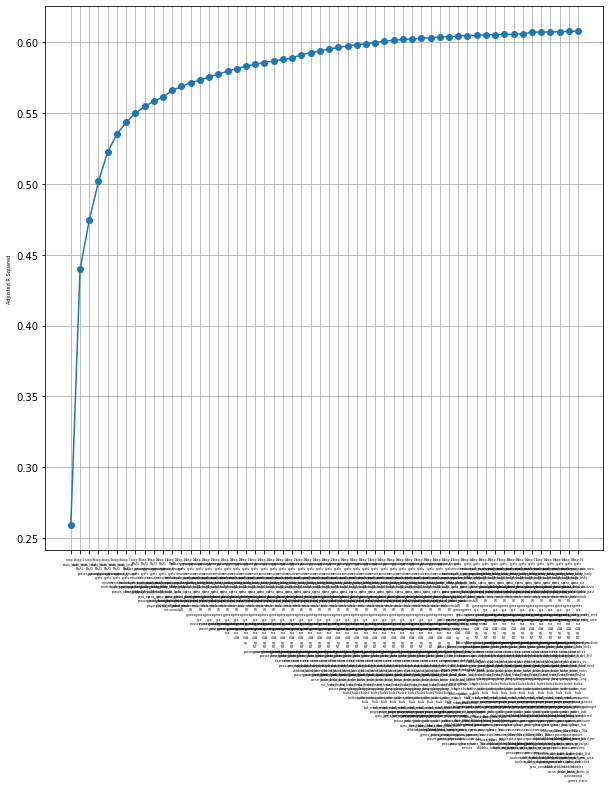

In [ ]:
# Visulalization of stepwise selection for field players
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 5
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
# Stepwise variables selection of goalkeepers data

# Delete columns for response and categorical variables
df0_gk = df2_gk.drop(['value','player','nationality','position','squad','position2','foot','league','CL','WinCL','CLBestScorer','Season','age','height'], axis=1)

# Explanatory variables and response variable
variables = df0_gk.columns.tolist()
y = df2_gk['value']
selected_variables = []
# Significance level
sl_enter = 0.05
sl_remove = 0.05
sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df0_gk[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df0_gk[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df0_gk[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
# Number of selected variables
len_stepwise_gk = len(selected_variables)
len_stepwise_gk

5

In [ ]:
# List of selected variables
stepwise_variables_gk = selected_variables
stepwise_variables_gk

['wins_gk', 'clean_sheets', 'passes_launched_gk', 'pens_saved', 'MP']

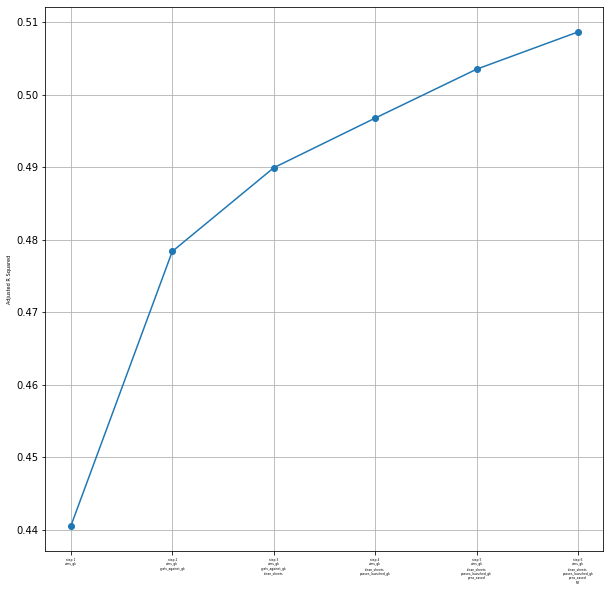

In [ ]:
# Visualization of stepwise selection for goalkeepers
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 5
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
# Vif for field players data
vif_fp = df2_fp[stepwise_variables_fp]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_fp.values, i) for i in range(vif_fp.shape[1])]
vif["features"] = vif_fp.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.485017,pens_conceded
1,2.324860,gca_dribbles
2,2.393209,shots_free_kicks
3,2.467419,goals_per_shot_on_target
4,2.708104,pens_att
5,3.156319,through_balls
6,3.414008,xg_net
7,3.890012,passes_other_body
8,4.382470,sca_shots
9,4.897236,sca_fouled


In [ ]:
# Vif for goalkeepers data
vif_gk = df2_gk[stepwise_variables_gk]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_gk.values, i) for i in range(vif_gk.shape[1])]
vif["features"] = vif_gk.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.783736,pens_saved
1,2.328734,MP
2,4.768164,passes_launched_gk
3,12.012378,wins_gk
4,15.321328,clean_sheets


In [ ]:
# Vif for goalkeepers data
vif_gk = df2_gk[stepwise_variables_gk]
vif_gk.drop(columns=['wins_gk'], axis=1, inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_gk.values, i) for i in range(vif_gk.shape[1])]
vif["features"] = vif_gk.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,VIF Factor,features
0,1.778623,pens_saved
1,2.280624,MP
2,4.145338,clean_sheets
3,4.697773,passes_launched_gk


In [ ]:
# Applying the result
vif_col_fp = ['pens_conceded','gca_dribbles','shots_free_kicks','goals_per_shot_on_target','pens_att','through_balls','xg_net',
             'passes_other_body','sca_shots','sca_fouled','aerials_won','passes_free_kicks','crosses_into_penalty_area',
             'dribbles_completed_pct','fouled','gca']
vif_col_gk = ['pens_saved','MP','clean_sheets','passes_launched_gk']
col_fp = list(df2_fp.iloc[:, 0:14]) + vif_col_fp
df3_fp = df2_fp[col_fp]
col_gk = list(df2_gk.iloc[:, 0:14]) + vif_col_gk
df3_gk = df2_gk[col_gk]

# Delete the columns 'plyaer', 'position2'
df3_fp.drop(columns=['player','position2'], axis=1, inplace=True)
df3_gk.drop(columns=['player','position2'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df3_fp.head()

,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,value,height,pens_conceded,gca_dribbles,shots_free_kicks,goals_per_shot_on_target,pens_att,through_balls,xg_net,passes_other_body,sca_shots,sca_fouled,aerials_won,passes_free_kicks,crosses_into_penalty_area,dribbles_completed_pct,fouled,gca
0,41,1,0,2,1,0.0,0.0,0.0,0,23.0,1800000.0,186.0,0.0,0.0,1.0,0.25,0.0,2.0,0.1,0.0,2.0,4.0,1.0,3.0,1.0,77.4,19.0,3.0
1,43,0,96,2,1,1.0,1.0,0.0,0,24.0,70000000.0,191.0,0.0,0.0,0.0,0.00,0.0,1.0,-0.9,5.0,3.0,0.0,31.0,24.0,0.0,83.3,12.0,2.0
2,41,0,0,1,1,0.0,0.0,0.0,0,21.0,2000000.0,179.0,2.0,0.0,0.0,0.00,0.0,1.0,-0.5,2.0,1.0,5.0,22.0,5.0,8.0,91.7,35.0,2.0
3,43,0,11,1,1,1.0,0.0,0.0,0,23.0,60000000.0,182.0,0.0,0.0,0.0,0.17,0.0,1.0,-0.1,8.0,0.0,1.0,41.0,19.0,0.0,75.0,25.0,1.0
4,41,3,0,1,1,0.0,0.0,0.0,0,31.0,1800000.0,183.0,0.0,0.0,0.0,0.38,2.0,1.0,-0.1,2.0,2.0,6.0,42.0,7.0,2.0,81.0,72.0,2.0


In [ ]:
df3_gk.head()

,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,value,height,pens_saved,MP,clean_sheets,passes_launched_gk
0,41,2,0,1,1,0.0,0.0,0.0,0,25.0,9000000.0,185.0,3.0,38.0,12.0,586.0
1,41,2,0,2,1,0.0,0.0,0.0,0,20.0,1000000.0,185.0,0.0,38.0,0.0,10.0
2,43,2,2,2,2,0.0,0.0,0.0,0,34.0,20000.0,184.0,0.0,38.0,0.0,15.0
3,43,2,2,2,2,0.0,0.0,0.0,0,30.0,3000000.0,182.0,0.0,38.0,11.0,725.0
4,43,2,3,1,2,0.0,0.0,0.0,0,34.0,50000.0,188.0,0.0,38.0,4.0,228.0


In [ ]:
print(df3_fp.shape)
print(df3_gk.shape)

(6421, 28)
(531, 16)


In [ ]:
# Data scaling for PCA
df3_fp_pca = df3_fp.iloc[:, 12:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result = scaler.fit_transform(df3_fp_pca)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03
mean,1.134412e-15,1.928582e-16,1.221747e-16,-1.080310e-16,-2.744867e-16,1.902612e-15,-7.929856e-17,-1.054202e-16,4.381759e-16,8.806743e-16,1.723863e-17,-6.346737e-16,2.386089e-16,-1.853196e-16,-2.040279e-16,-4.465790e-16
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-4.049025e-01,-3.497560e-01,-3.125010e-01,-8.033159e-01,-2.603871e-01,-5.519409e-01,-6.164943e+00,-7.973580e-01,-6.832236e-01,-6.437464e-01,-8.107176e-01,-7.201735e-01,-6.381164e-01,-2.227858e+00,-1.029660e+00,-7.652776e-01
25%,-4.049025e-01,-3.497560e-01,-3.125010e-01,-8.033159e-01,-2.603871e-01,-5.519409e-01,-4.058073e-01,-5.830314e-01,-6.832236e-01,-6.437464e-01,-6.517589e-01,-6.703944e-01,-6.381164e-01,-3.096647e-01,-7.388117e-01,-7.652776e-01
50%,-4.049025e-01,-3.497560e-01,-3.125010e-01,-2.962709e-01,-2.603871e-01,-5.519409e-01,-8.585536e-02,-3.687047e-01,-2.214364e-01,-2.731290e-01,-3.338416e-01,-4.214986e-01,-4.457618e-01,1.085015e-01,-2.734545e-01,-3.091302e-01
75%,-4.049025e-01,-3.497560e-01,-3.125010e-01,4.837985e-01,-2.603871e-01,2.864817e-01,3.140846e-01,2.742754e-01,2.403509e-01,9.748835e-02,2.622533e-01,2.754095e-01,1.313020e-01,5.842135e-01,4.827511e-01,3.750908e-01
max,9.556319e+00,1.553681e+01,1.838471e+01,3.097031e+00,1.600368e+01,1.957020e+01,1.015261e+01,1.313388e+01,1.178503e+01,1.121601e+01,9.760032e+00,8.538748e+00,8.787260e+00,1.608529e+00,8.684673e+00,9.041891e+00


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.90)+1

print(d)

11


In [ ]:
# Processing PCA
pca = PCA(n_components=10)
X_redufced = pca.fit_transform(data_scaled)
result = pd.DataFrame(X_redufced) 
result

,0,1,2,3,4,5,6,7,8,9
0,-0.114021,0.794820,0.048132,0.200802,-0.006153,-1.066376,0.003152,-0.097474,1.060440,0.537769
1,-0.551850,-0.853237,-0.716878,-0.571188,0.403582,-1.100049,-0.342823,0.366134,-0.486845,0.221188
2,0.315503,-1.940694,-1.050466,0.383511,-0.964051,0.113453,2.835954,-1.176430,1.406322,0.348393
3,-0.388489,-1.180292,0.252729,-0.673271,0.133535,-0.622214,-0.683045,0.360870,0.093796,-0.738499
4,1.912225,-0.549556,0.277757,-1.349356,0.326239,-0.775639,-0.355057,-1.582995,2.055626,-0.763453
...,...,...,...,...,...,...,...,...,...,...
6416,-0.827285,1.094987,0.273594,-0.178586,-0.211198,-1.027333,0.736182,0.214511,0.167914,0.213800
6417,0.516999,-2.980781,0.190652,-1.039191,0.502628,-0.332186,-1.255526,0.732786,-0.755802,-0.151114
6418,4.581098,0.462026,-0.456580,-0.825325,-0.560257,-0.823766,0.060652,0.448670,3.060358,-1.203156
6419,-2.056018,0.202595,-0.099135,0.263833,0.272449,-1.826330,0.307526,-0.434713,-0.190398,-0.103663


In [ ]:
# Applying the PCA result
df4_fp = df3_fp.iloc[:,0:12]
df4_fp = pd.concat([df4_fp, result], axis=1)
df4_gk = df3_gk
df4_fp

,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,value,height,0,1,2,3,4,5,6,7,8,9
0,41,1,0,2,1,0.0,0.0,0.0,0,23.0,1800000.0,186.0,-0.114021,0.794820,0.048132,0.200802,-0.006153,-1.066376,0.003152,-0.097474,1.060440,0.537769
1,43,0,96,2,1,1.0,1.0,0.0,0,24.0,70000000.0,191.0,-0.551850,-0.853237,-0.716878,-0.571188,0.403582,-1.100049,-0.342823,0.366134,-0.486845,0.221188
2,41,0,0,1,1,0.0,0.0,0.0,0,21.0,2000000.0,179.0,0.315503,-1.940694,-1.050466,0.383511,-0.964051,0.113453,2.835954,-1.176430,1.406322,0.348393
3,43,0,11,1,1,1.0,0.0,0.0,0,23.0,60000000.0,182.0,-0.388489,-1.180292,0.252729,-0.673271,0.133535,-0.622214,-0.683045,0.360870,0.093796,-0.738499
4,41,3,0,1,1,0.0,0.0,0.0,0,31.0,1800000.0,183.0,1.912225,-0.549556,0.277757,-1.349356,0.326239,-0.775639,-0.355057,-1.582995,2.055626,-0.763453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,89,1,128,2,3,0.0,0.0,0.0,2,23.0,12000000.0,165.0,-0.827285,1.094987,0.273594,-0.178586,-0.211198,-1.027333,0.736182,0.214511,0.167914,0.213800
6417,69,0,128,1,3,0.0,0.0,0.0,2,29.0,4000000.0,188.0,0.516999,-2.980781,0.190652,-1.039191,0.502628,-0.332186,-1.255526,0.732786,-0.755802,-0.151114
6418,41,1,128,2,3,0.0,0.0,0.0,2,23.0,25000000.0,178.0,4.581098,0.462026,-0.456580,-0.825325,-0.560257,-0.823766,0.060652,0.448670,3.060358,-1.203156
6419,41,0,128,2,3,0.0,0.0,0.0,2,22.0,6000000.0,184.0,-2.056018,0.202595,-0.099135,0.263833,0.272449,-1.826330,0.307526,-0.434713,-0.190398,-0.103663


<Figure size 432x288 with 0 Axes>

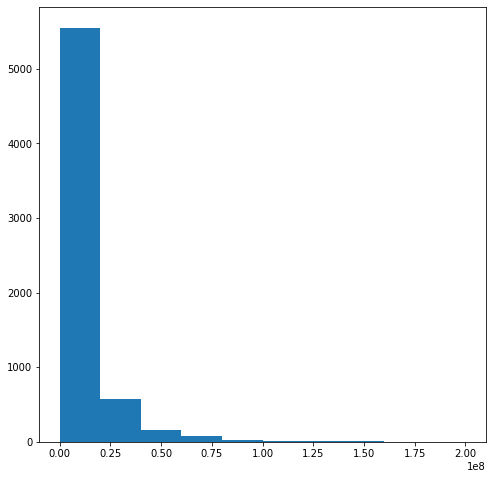

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking the distribution of 'value'
fig = plt.figure(figsize=(8,8))
plt.hist(df3_fp['value'])
plt.figure()

In [ ]:
# Changing the column 'value' to 'log_value'
df4_fp['log_value'] = np.log1p(df4_fp['value'])
real_value = df4_fp['value']
df4_fp.drop('value', axis=1, inplace=True)

df4_gk['log_value'] = np.log1p(df4_gk['value'])
real_value = df4_gk['value']
df4_gk.drop('value', axis=1, inplace=True)

df4_fp.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,height,0,1,2,3,4,5,6,7,8,9,log_value
0,41,1,0,2,1,0.0,0.0,0.0,0,23.0,186.0,-0.114021,0.79482,0.048132,0.200802,-0.006153,-1.066376,0.003152,-0.097474,1.06044,0.537769,14.403298


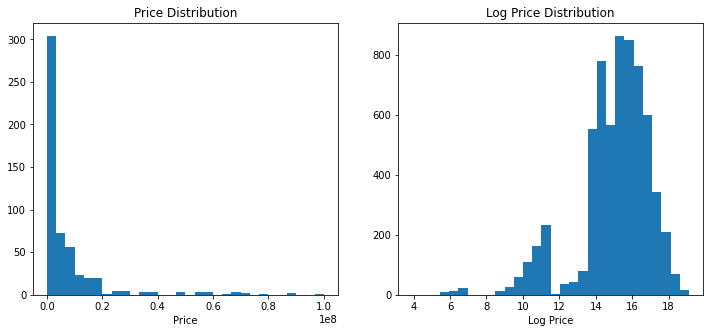

In [ ]:
# Visualization for the distributions
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(real_value, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(df4_fp['log_value'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')
plt.show()

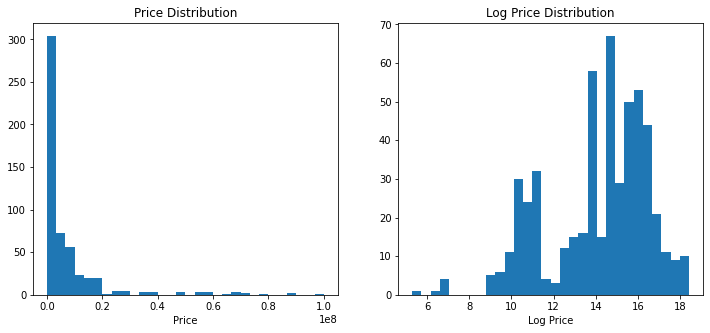

In [ ]:
# Same process for goalkeepers data
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(real_value, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(df4_gk['log_value'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')
plt.show()

## Data modeling

In [ ]:
!pip3 install optuna

# Split the data into explanatory variables and response variable
df_X = df4_fp.drop('log_value', axis=1)
df_y = pd.DataFrame(df4_fp['log_value'])

df_gk_X = df3_gk.drop('log_value', axis=1)
df_gk_y = pd.DataFrame(df3_gk['log_value'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2012)
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(df_gk_X, df_gk_y, test_size=0.2, random_state=2012)

In [ ]:
# Field players
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Goalkeepers
print(X_train_gk.shape)
print(X_test_gk.shape)
print(y_train_gk.shape)
print(y_test_gk.shape)

(5136, 21)
(1285, 21)
(5136, 1)
(1285, 1)
(424, 15)
(107, 15)
(424, 1)
(107, 1)


In [ ]:
# Modeling
def my_regressor(df_X, df_y):
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import Ridge, Lasso, ElasticNet
  from sklearn.linear_model import ARDRegression, BayesianRidge
  from sklearn.ensemble import RandomForestRegressor
  from xgboost import XGBRegressor
  from sklearn.model_selection import cross_val_score
  
  import ast
  
  linear = LinearRegression()
  ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
  ardr_linear, baysian_ridge = ARDRegression(), BayesianRidge()
  random_forest = RandomForestRegressor()
  xgboost_linear = XGBRegressor()

  my_model_list = ['linear','ridge','lasso','elasticnet','ardr_linear','baysian_ridge','random_forest','xgboost_linear']

  score_dic = dict()

  for model_nm in my_model_list:
    scores = cross_val_score(eval(model_nm), df_X, df_y, scoring = "neg_mean_squared_error", cv=5)
    rmse_score = np.sqrt(-scores)
    rmse_sm = rmse_score.mean()
    score_dic[model_nm] = rmse_sm

  score_dic = sorted(score_dic.items(), key=lambda t : t[1])

  return score_dic

linear_model_train_score = my_regressor(X_train, y_train)
linear_model_train_score_gk = my_regressor(X_train_gk, y_train_gk)
print(linear_model_train_score)
print(linear_model_train_score_gk)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[04:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

[04:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[('xgboost_linear', 1.2895178088268244), ('random_forest', 1.3521977282864572), ('baysian_ridge', 1.6005872242015822), ('ridge', 1.6006124799423531), ('linear', 1.6009018485469), ('ardr_linear', 1.6016165484135283), ('elasticnet', 1.7782286495882063), ('lasso', 1.8280869176495664)]
[('xgboost_linear', 1.4812884415856096), ('random_forest', 1.5124788404870262), ('

In [ ]:
# Hyper-parameter tuning for Field players
import xgboost as xgb
from sklearn.model_selection import KFold
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def objective(trial):

    kf = KFold(n_splits=10, shuffle=True)
    
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'folds' : kf
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-12-03 04:49:11,300] A new study created in memory with name: no-name-63c14795-bf31-48a4-89ba-f149c3eb51dd


[04:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:49:27,202] Trial 0 finished with value: 1.2724318763014097 and parameters: {'lambda': 5.470646064517804, 'alpha': 0.0062203649263950465, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 106}. Best is trial 0 with value: 1.2724318763014097.


[04:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:49:46,859] Trial 1 finished with value: 1.3090006320827325 and parameters: {'lambda': 0.011792148614839593, 'alpha': 0.2212941401901674, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 295}. Best is trial 0 with value: 1.2724318763014097.


[04:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:49:59,002] Trial 2 finished with value: 1.3011847058341874 and parameters: {'lambda': 5.39810445687079, 'alpha': 0.011529128974597565, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 146}. Best is trial 0 with value: 1.2724318763014097.


[04:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:50:20,347] Trial 3 finished with value: 1.2901455554226302 and parameters: {'lambda': 0.350811700055824, 'alpha': 0.0026357753778836726, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.009, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 288}. Best is trial 0 with value: 1.2724318763014097.


[04:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:50:44,500] Trial 4 finished with value: 1.2120803056185134 and parameters: {'lambda': 0.038183970838480887, 'alpha': 0.10307569252052964, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 29}. Best is trial 4 with value: 1.2120803056185134.


[04:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:51:09,074] Trial 5 finished with value: 1.1945272413921322 and parameters: {'lambda': 0.3054727528654893, 'alpha': 0.09640740022328834, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 38}. Best is trial 5 with value: 1.1945272413921322.


[04:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:51:25,433] Trial 6 finished with value: 1.2883046923853827 and parameters: {'lambda': 0.0012106471981386427, 'alpha': 2.0750593802646184, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 258}. Best is trial 5 with value: 1.1945272413921322.


[04:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:51:40,179] Trial 7 finished with value: 1.324620718062923 and parameters: {'lambda': 0.6097790722156108, 'alpha': 0.3873564792646745, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 233}. Best is trial 5 with value: 1.1945272413921322.


[04:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:51:58,111] Trial 8 finished with value: 1.3268402410118414 and parameters: {'lambda': 0.5748427952485992, 'alpha': 0.0120832655000651, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 300}. Best is trial 5 with value: 1.1945272413921322.


[04:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:52:29,610] Trial 9 finished with value: 1.2454686441362024 and parameters: {'lambda': 0.35747431551004466, 'alpha': 0.0016741383670093952, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 135}. Best is trial 5 with value: 1.1945272413921322.


[04:52:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:52:48,020] Trial 10 finished with value: 1.1986537148661107 and parameters: {'lambda': 0.007175250042734753, 'alpha': 8.223427926894928, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 16}. Best is trial 5 with value: 1.1945272413921322.


[04:52:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:53:38,732] Trial 11 finished with value: 1.2268468754379804 and parameters: {'lambda': 0.004227153184021447, 'alpha': 9.81396911626321, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 2}. Best is trial 5 with value: 1.1945272413921322.


[04:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:54:05,614] Trial 12 finished with value: 1.2012123830984502 and parameters: {'lambda': 0.05122305270709477, 'alpha': 0.6985732407553321, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 72}. Best is trial 5 with value: 1.1945272413921322.


[04:54:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:54:23,891] Trial 13 finished with value: 1.2029212694005758 and parameters: {'lambda': 0.012176058346371161, 'alpha': 0.04227705190644671, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 63}. Best is trial 5 with value: 1.1945272413921322.


[04:54:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:55:00,962] Trial 14 finished with value: 1.2326196746818656 and parameters: {'lambda': 0.14844620804901937, 'alpha': 9.797062725427189, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 198}. Best is trial 5 with value: 1.1945272413921322.


[04:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:55:30,400] Trial 15 finished with value: 1.1959982107980638 and parameters: {'lambda': 1.4471107719128493, 'alpha': 0.0508696253653455, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 49}. Best is trial 5 with value: 1.1945272413921322.


[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:55:47,542] Trial 16 finished with value: 1.2163389996363525 and parameters: {'lambda': 2.1221047407976714, 'alpha': 0.07009885224616344, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 68}. Best is trial 5 with value: 1.1945272413921322.


[04:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:56:02,916] Trial 17 finished with value: 1.2598055418511958 and parameters: {'lambda': 1.869613258808741, 'alpha': 0.023903998083355363, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 110}. Best is trial 5 with value: 1.1945272413921322.


[04:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:56:15,739] Trial 18 finished with value: 1.236781296291774 and parameters: {'lambda': 1.4624663880595112, 'alpha': 0.1273561039043968, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 186}. Best is trial 5 with value: 1.1945272413921322.


[04:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:56:43,139] Trial 19 finished with value: 1.2005518708009089 and parameters: {'lambda': 0.10317208072179487, 'alpha': 0.822111063419322, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 45}. Best is trial 5 with value: 1.1945272413921322.


[04:56:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:57:11,894] Trial 20 finished with value: 1.2116278252482398 and parameters: {'lambda': 8.549746757217884, 'alpha': 0.030792011463210627, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 101}. Best is trial 5 with value: 1.1945272413921322.


[04:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:57:41,611] Trial 21 finished with value: 1.2046685679474138 and parameters: {'lambda': 0.0012389633191702363, 'alpha': 2.705875605727035, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 5}. Best is trial 5 with value: 1.1945272413921322.


[04:57:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:58:09,743] Trial 22 finished with value: 1.201687915201256 and parameters: {'lambda': 0.21095875843642858, 'alpha': 0.20270889255977195, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 32}. Best is trial 5 with value: 1.1945272413921322.


[04:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:58:28,483] Trial 23 finished with value: 1.1989685092868234 and parameters: {'lambda': 0.03715788469744769, 'alpha': 0.056826370461587686, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 25}. Best is trial 5 with value: 1.1945272413921322.


[04:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:58:45,634] Trial 24 finished with value: 1.2071007950700652 and parameters: {'lambda': 1.0160436751263322, 'alpha': 2.344292229923183, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 85}. Best is trial 5 with value: 1.1945272413921322.


[04:58:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:59:13,233] Trial 25 finished with value: 1.2081691523360738 and parameters: {'lambda': 0.015419707572922811, 'alpha': 0.8878890693131718, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 49}. Best is trial 5 with value: 1.1945272413921322.


[04:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 04:59:51,290] Trial 26 finished with value: 1.2388403022006707 and parameters: {'lambda': 0.0036071116826034673, 'alpha': 0.0165336577308905, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 1}. Best is trial 5 with value: 1.1945272413921322.


[04:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:00:24,062] Trial 27 finished with value: 1.2556119099689775 and parameters: {'lambda': 0.06533382421536817, 'alpha': 0.005777410557842944, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 179}. Best is trial 5 with value: 1.1945272413921322.


[05:00:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:00:46,082] Trial 28 finished with value: 1.218132860176421 and parameters: {'lambda': 2.9884339645421836, 'alpha': 0.23194945449182175, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 45}. Best is trial 5 with value: 1.1945272413921322.


[05:00:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:01:05,140] Trial 29 finished with value: 1.282418025297389 and parameters: {'lambda': 4.104040910882543, 'alpha': 0.00538605565400717, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 121}. Best is trial 5 with value: 1.1945272413921322.


[05:01:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:01:18,585] Trial 30 finished with value: 1.2172756362171513 and parameters: {'lambda': 0.9092446228706632, 'alpha': 0.39062728440593336, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 93}. Best is trial 5 with value: 1.1945272413921322.


[05:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:01:37,161] Trial 31 finished with value: 1.1989685092868234 and parameters: {'lambda': 0.03209184768189384, 'alpha': 0.06150283942445019, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 25}. Best is trial 5 with value: 1.1945272413921322.


[05:01:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:01:55,651] Trial 32 finished with value: 1.1923833634141954 and parameters: {'lambda': 0.02010963130741836, 'alpha': 0.05964163401883547, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 31}. Best is trial 32 with value: 1.1923833634141954.


[05:01:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:02:09,327] Trial 33 finished with value: 1.2036960078982093 and parameters: {'lambda': 0.019698868179490302, 'alpha': 0.12332878044087336, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 57}. Best is trial 32 with value: 1.1923833634141954.


[05:02:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:02:22,484] Trial 34 finished with value: 1.2335996340300261 and parameters: {'lambda': 0.005942489965486883, 'alpha': 0.019329282551398576, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 80}. Best is trial 32 with value: 1.1923833634141954.


[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:02:37,077] Trial 35 finished with value: 1.198493526349204 and parameters: {'lambda': 0.006896329820897204, 'alpha': 0.03283223079196523, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 18}. Best is trial 32 with value: 1.1923833634141954.


[05:02:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:02:49,275] Trial 36 finished with value: 1.2435736763794416 and parameters: {'lambda': 0.20105959077034585, 'alpha': 0.03716954001941532, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 40}. Best is trial 32 with value: 1.1923833634141954.


[05:02:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:03:12,210] Trial 37 finished with value: 1.2437164204698852 and parameters: {'lambda': 0.0018514613121728616, 'alpha': 0.08855993458923521, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 158}. Best is trial 32 with value: 1.1923833634141954.


[05:03:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:03:28,439] Trial 38 finished with value: 1.189512072590879 and parameters: {'lambda': 0.02408193403779396, 'alpha': 0.009074187206470085, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 19}. Best is trial 38 with value: 1.189512072590879.


[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:03:39,177] Trial 39 finished with value: 1.2202775854779015 and parameters: {'lambda': 0.020831842481598084, 'alpha': 0.003263549636222248, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 60}. Best is trial 38 with value: 1.189512072590879.


[05:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:04:00,386] Trial 40 finished with value: 1.2202956068013704 and parameters: {'lambda': 0.079779808821487, 'alpha': 0.009835658284986889, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.009, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 33}. Best is trial 38 with value: 1.189512072590879.


[05:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:04:16,645] Trial 41 finished with value: 1.189512072590879 and parameters: {'lambda': 0.008770900855568647, 'alpha': 0.00850756679199725, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 19}. Best is trial 38 with value: 1.189512072590879.


[05:04:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:04:29,352] Trial 42 finished with value: 1.1898521089130165 and parameters: {'lambda': 0.3787994725374828, 'alpha': 0.00963294724444123, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 15}. Best is trial 38 with value: 1.189512072590879.


[05:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:04:40,623] Trial 43 finished with value: 1.183084765002578 and parameters: {'lambda': 0.44789466560214525, 'alpha': 0.0013906912653865316, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 10}. Best is trial 43 with value: 1.183084765002578.


[05:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:04:52,053] Trial 44 finished with value: 1.183386043959159 and parameters: {'lambda': 0.4501120083615014, 'alpha': 0.0010868006753610845, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 13}. Best is trial 43 with value: 1.183084765002578.


[05:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:05:04,876] Trial 45 finished with value: 1.1898521089130165 and parameters: {'lambda': 0.4499865512340657, 'alpha': 0.001826464874830541, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 15}. Best is trial 43 with value: 1.183084765002578.


[05:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:05:18,538] Trial 46 finished with value: 1.2162595786001236 and parameters: {'lambda': 0.5378812982539222, 'alpha': 0.0015793898336279807, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 11}. Best is trial 43 with value: 1.183084765002578.


[05:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:05:34,955] Trial 47 finished with value: 1.3231674417103574 and parameters: {'lambda': 0.3131872806152908, 'alpha': 0.0033138374971395986, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 226}. Best is trial 43 with value: 1.183084765002578.


[05:05:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:05:56,205] Trial 48 finished with value: 1.2592326005703338 and parameters: {'lambda': 0.12027954163155324, 'alpha': 0.001330682918788759, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 272}. Best is trial 43 with value: 1.183084765002578.


[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:06:10,198] Trial 49 finished with value: 1.2085356621753574 and parameters: {'lambda': 0.8158889198742864, 'alpha': 0.002317912166584738, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 43 with value: 1.183084765002578.


[05:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:06:23,039] Trial 50 finished with value: 1.192631973112678 and parameters: {'lambda': 0.19962654792087933, 'alpha': 0.0010780664571794665, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 14}. Best is trial 43 with value: 1.183084765002578.


[05:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:06:34,382] Trial 51 finished with value: 1.1916991475682304 and parameters: {'lambda': 0.45084331541629397, 'alpha': 0.00915931817693552, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 20}. Best is trial 43 with value: 1.183084765002578.


[05:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:06:46,716] Trial 52 finished with value: 1.1885163849863887 and parameters: {'lambda': 0.47058427595396596, 'alpha': 0.004395749214819947, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 16}. Best is trial 43 with value: 1.183084765002578.


[05:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:06:56,812] Trial 53 finished with value: 1.1943312759034919 and parameters: {'lambda': 0.6846097796612695, 'alpha': 0.0024338294614950095, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 37}. Best is trial 43 with value: 1.183084765002578.


[05:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:07:23,672] Trial 54 finished with value: 1.195016891289029 and parameters: {'lambda': 0.009600648384761518, 'alpha': 0.00456864068745896, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 54}. Best is trial 43 with value: 1.183084765002578.


[05:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:07:33,483] Trial 55 finished with value: 1.186392249598807 and parameters: {'lambda': 0.2652676195571414, 'alpha': 0.007812729743256006, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 11}. Best is trial 43 with value: 1.183084765002578.


[05:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:07:44,023] Trial 56 finished with value: 1.210706703404184 and parameters: {'lambda': 0.2746419351204051, 'alpha': 0.007441739049198115, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 71}. Best is trial 43 with value: 1.183084765002578.


[05:07:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:07:55,399] Trial 57 finished with value: 1.188638978159397 and parameters: {'lambda': 0.1464659324309493, 'alpha': 0.004073766696224738, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 28}. Best is trial 43 with value: 1.183084765002578.


[05:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:08:05,357] Trial 58 finished with value: 1.2106985658384315 and parameters: {'lambda': 0.13740296317423084, 'alpha': 0.003741549419584449, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 28}. Best is trial 43 with value: 1.183084765002578.


[05:08:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:08:15,957] Trial 59 finished with value: 1.1846810693684295 and parameters: {'lambda': 1.1808563399143324, 'alpha': 0.0010657623880014188, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 8}. Best is trial 43 with value: 1.183084765002578.


[05:08:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:08:27,647] Trial 60 finished with value: 1.2154028198896243 and parameters: {'lambda': 1.181768107217813, 'alpha': 0.0010810969174465642, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 5}. Best is trial 43 with value: 1.183084765002578.


[05:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:08:41,110] Trial 61 finished with value: 1.1858153568617373 and parameters: {'lambda': 0.25499999842518495, 'alpha': 0.0019082935306967736, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 40}. Best is trial 43 with value: 1.183084765002578.


[05:08:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:08:56,405] Trial 62 finished with value: 1.1896203600388993 and parameters: {'lambda': 0.2373358974397134, 'alpha': 0.002151859365011939, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 43}. Best is trial 43 with value: 1.183084765002578.


[05:08:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:09:05,252] Trial 63 finished with value: 1.1819705125825097 and parameters: {'lambda': 0.6106899368498404, 'alpha': 0.001558377624059179, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 10}. Best is trial 63 with value: 1.1819705125825097.


[05:09:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:09:14,776] Trial 64 finished with value: 1.1881866889035817 and parameters: {'lambda': 1.9680790827995482, 'alpha': 0.001394221585414367, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 7}. Best is trial 63 with value: 1.1819705125825097.


[05:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:09:33,130] Trial 65 finished with value: 1.2107714945529722 and parameters: {'lambda': 1.7777205327095662, 'alpha': 0.0014368334218120265, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 63 with value: 1.1819705125825097.


[05:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:09:42,013] Trial 66 finished with value: 1.1819705125825097 and parameters: {'lambda': 2.715356006102565, 'alpha': 0.0011024120633562813, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 10}. Best is trial 63 with value: 1.1819705125825097.


[05:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:09:52,157] Trial 67 finished with value: 1.1896798789860668 and parameters: {'lambda': 2.721346980748161, 'alpha': 0.0010104818256536684, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 37}. Best is trial 63 with value: 1.1819705125825097.


[05:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:10:01,444] Trial 68 finished with value: 1.207140308450021 and parameters: {'lambda': 1.3006936488085805, 'alpha': 0.002649930914772159, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 29}. Best is trial 63 with value: 1.1819705125825097.


[05:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:10:12,537] Trial 69 finished with value: 1.2259801834593522 and parameters: {'lambda': 8.198838807439278, 'alpha': 0.0018532679367683298, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 47}. Best is trial 63 with value: 1.1819705125825097.


[05:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:10:25,976] Trial 70 finished with value: 1.194452867547689 and parameters: {'lambda': 0.6870290972874156, 'alpha': 0.00272741969078762, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 9}. Best is trial 63 with value: 1.1819705125825097.


[05:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:10:34,887] Trial 71 finished with value: 1.1819705125825097 and parameters: {'lambda': 5.393199435256156, 'alpha': 0.001341115929489642, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 10}. Best is trial 63 with value: 1.1819705125825097.


[05:10:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:10:45,535] Trial 72 finished with value: 1.1846810693684295 and parameters: {'lambda': 4.648136248249549, 'alpha': 0.0013176738964404257, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 8}. Best is trial 63 with value: 1.1819705125825097.


[05:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:10:56,583] Trial 73 finished with value: 1.1851879922335757 and parameters: {'lambda': 5.471883840823751, 'alpha': 0.0018054293336394523, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 24}. Best is trial 63 with value: 1.1819705125825097.


[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:11:10,103] Trial 74 finished with value: 1.229763864305901 and parameters: {'lambda': 5.260852790681832, 'alpha': 0.0012955654756907676, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 23}. Best is trial 63 with value: 1.1819705125825097.


[05:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:11:25,170] Trial 75 finished with value: 1.1901621719780302 and parameters: {'lambda': 3.8979309867216214, 'alpha': 0.0010148056832466163, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 63 with value: 1.1819705125825097.


[05:11:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:11:46,377] Trial 76 finished with value: 1.190930218627683 and parameters: {'lambda': 2.5602037578596772, 'alpha': 0.0015826473515432634, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 25}. Best is trial 63 with value: 1.1819705125825097.


[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:11:55,740] Trial 77 finished with value: 1.1874874562204945 and parameters: {'lambda': 6.527464075316631, 'alpha': 0.0029586375821031748, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 9}. Best is trial 63 with value: 1.1819705125825097.


[05:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:12:10,406] Trial 78 finished with value: 1.2075303590316637 and parameters: {'lambda': 3.970819384836671, 'alpha': 0.002165607924060481, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 63}. Best is trial 63 with value: 1.1819705125825097.


[05:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:12:25,190] Trial 79 finished with value: 1.2184392530823123 and parameters: {'lambda': 5.899153368844804, 'alpha': 0.0013337933771175607, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 53}. Best is trial 63 with value: 1.1819705125825097.


[05:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:12:35,739] Trial 80 finished with value: 1.2215309497654279 and parameters: {'lambda': 8.011856875821088, 'alpha': 0.001765917626963288, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 31}. Best is trial 63 with value: 1.1819705125825097.


[05:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:12:49,076] Trial 81 finished with value: 1.1858153568617373 and parameters: {'lambda': 3.3985706408746292, 'alpha': 0.0019688592012142192, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 40}. Best is trial 63 with value: 1.1819705125825097.


[05:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:12:59,450] Trial 82 finished with value: 1.189770189681735 and parameters: {'lambda': 3.2369910643139037, 'alpha': 0.0012322163891253764, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 21}. Best is trial 63 with value: 1.1819705125825097.


[05:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:13:19,023] Trial 83 finished with value: 1.187056125447929 and parameters: {'lambda': 4.787667051080915, 'alpha': 0.0017042641631402585, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 8}. Best is trial 63 with value: 1.1819705125825097.


[05:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:13:28,588] Trial 84 finished with value: 1.1850163132892935 and parameters: {'lambda': 9.929938997531204, 'alpha': 0.002293668148790606, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 36}. Best is trial 63 with value: 1.1819705125825097.


[05:13:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:13:49,921] Trial 85 finished with value: 1.230017531434058 and parameters: {'lambda': 1.5532080078158876, 'alpha': 0.005605937114904706, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 154}. Best is trial 63 with value: 1.1819705125825097.


[05:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:14:01,181] Trial 86 finished with value: 1.191391783499045 and parameters: {'lambda': 6.810672894570827, 'alpha': 0.0031390494764459583, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 13}. Best is trial 63 with value: 1.1819705125825097.


[05:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:14:13,114] Trial 87 finished with value: 1.2165768298702544 and parameters: {'lambda': 9.97873128844357, 'alpha': 0.0012270409419579836, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 34}. Best is trial 63 with value: 1.1819705125825097.


[05:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:14:32,566] Trial 88 finished with value: 1.2136423436901551 and parameters: {'lambda': 2.466549539009522, 'alpha': 0.0024658406542619814, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 130}. Best is trial 63 with value: 1.1819705125825097.


[05:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:14:43,209] Trial 89 finished with value: 1.2273868216433024 and parameters: {'lambda': 5.1138007650717245, 'alpha': 0.0010107232717538257, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 21}. Best is trial 63 with value: 1.1819705125825097.


[05:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:15:10,192] Trial 90 finished with value: 1.1927621670725028 and parameters: {'lambda': 1.0311502840281233, 'alpha': 3.763654032997669, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 48}. Best is trial 63 with value: 1.1819705125825097.


[05:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:15:19,890] Trial 91 finished with value: 1.1850163132892935 and parameters: {'lambda': 0.38761207927168806, 'alpha': 0.001630956738889068, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 36}. Best is trial 63 with value: 1.1819705125825097.


[05:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:15:34,844] Trial 92 finished with value: 1.200719028921903 and parameters: {'lambda': 0.8640628865278795, 'alpha': 0.0014450698508437282, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 81}. Best is trial 63 with value: 1.1819705125825097.


[05:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:15:46,660] Trial 93 finished with value: 1.1869273547333015 and parameters: {'lambda': 2.219898317339247, 'alpha': 0.0016200703577717817, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 23}. Best is trial 63 with value: 1.1819705125825097.


[05:15:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:15:58,264] Trial 94 finished with value: 1.1871796382428834 and parameters: {'lambda': 0.3607785129212057, 'alpha': 0.002171641445947762, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 14}. Best is trial 63 with value: 1.1819705125825097.


[05:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:16:12,719] Trial 95 finished with value: 1.2095058649602624 and parameters: {'lambda': 9.798687923259152, 'alpha': 0.003357578314116151, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 8}. Best is trial 63 with value: 1.1819705125825097.


[05:16:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:16:27,855] Trial 96 finished with value: 1.2005426338565062 and parameters: {'lambda': 0.5909073118803733, 'alpha': 0.0012078422804218556, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 34}. Best is trial 63 with value: 1.1819705125825097.


[05:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:16:57,100] Trial 97 finished with value: 1.1948064391897413 and parameters: {'lambda': 4.5697142312857535, 'alpha': 0.0024534497096423097, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 17}. Best is trial 63 with value: 1.1819705125825097.


[05:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:08,681] Trial 98 finished with value: 1.1860785220796923 and parameters: {'lambda': 7.39289548850275, 'alpha': 0.0015544297088642919, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 27}. Best is trial 63 with value: 1.1819705125825097.


[05:17:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:21,740] Trial 99 finished with value: 1.2029769226325304 and parameters: {'lambda': 0.7385915294157587, 'alpha': 0.004698361782749541, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 5}. Best is trial 63 with value: 1.1819705125825097.


Number of finished trials: 100
Best trial: {'lambda': 0.6106899368498404, 'alpha': 0.001558377624059179, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 10}


In [ ]:
trial = study.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 1.1819705125825097,
params {'lambda': 0.6106899368498404, 'alpha': 0.001558377624059179, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 10}


In [ ]:
# Hyper-parameter tuning for goalkeepers
def objective_gk(trial):
    
    kf = KFold(n_splits=10, shuffle=True)

    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'folds' : kf
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(X_train_gk,y_train_gk,eval_set=[(X_train_gk, y_train_gk),(X_test_gk,y_test_gk)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test_gk)
    
    rmse = mean_squared_error(y_test_gk, preds,squared=False)
    
    return rmse

study_gk = optuna.create_study(direction='minimize')
study_gk.optimize(objective_gk, n_trials=100)
print('Number of finished trials:', len(study_gk.trials))
print('Best trial:', study_gk.best_trial.params)

[I 2021-12-03 05:17:21,808] A new study created in memory with name: no-name-78dc69f7-30ce-4d2d-af01-119b5f9ac2a4


[05:17:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:23,011] Trial 0 finished with value: 1.5174028069101024 and parameters: {'lambda': 0.004094176003734977, 'alpha': 0.6568441579972806, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 71}. Best is trial 0 with value: 1.5174028069101024.


[05:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:23,869] Trial 1 finished with value: 2.434397197446976 and parameters: {'lambda': 0.4711826278024551, 'alpha': 0.009635649997326655, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 267}. Best is trial 0 with value: 1.5174028069101024.


[05:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:26,570] Trial 2 finished with value: 1.8318041181346605 and parameters: {'lambda': 0.01350963244638867, 'alpha': 9.82253922917407, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 131}. Best is trial 0 with value: 1.5174028069101024.


[05:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:28,072] Trial 3 finished with value: 1.8038649554934914 and parameters: {'lambda': 0.07552753453459594, 'alpha': 2.755658795308519, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 124}. Best is trial 0 with value: 1.5174028069101024.


[05:17:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:28,895] Trial 4 finished with value: 2.4343976739413993 and parameters: {'lambda': 0.9745551393378512, 'alpha': 0.3318705593433195, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 204}. Best is trial 0 with value: 1.5174028069101024.


[05:17:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:30,203] Trial 5 finished with value: 2.4344902504765167 and parameters: {'lambda': 0.026075716142640308, 'alpha': 0.30036661981694895, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 228}. Best is trial 0 with value: 1.5174028069101024.


[05:17:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:32,049] Trial 6 finished with value: 2.434451818656411 and parameters: {'lambda': 5.925995532738928, 'alpha': 0.26049936121725853, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 267}. Best is trial 0 with value: 1.5174028069101024.


[05:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:33,660] Trial 7 finished with value: 1.416997244650436 and parameters: {'lambda': 0.047580582148200254, 'alpha': 0.002775152347978055, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 32}. Best is trial 7 with value: 1.416997244650436.


[05:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:35,025] Trial 8 finished with value: 1.4254419312281486 and parameters: {'lambda': 0.004149292296461134, 'alpha': 0.018461499509665205, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.009, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 18}. Best is trial 7 with value: 1.416997244650436.


[05:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:35,833] Trial 9 finished with value: 1.408860878944678 and parameters: {'lambda': 4.114864866082339, 'alpha': 0.025033743438562912, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 34}. Best is trial 9 with value: 1.408860878944678.


[05:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:37,505] Trial 10 finished with value: 1.7022522279407595 and parameters: {'lambda': 9.424565022161424, 'alpha': 0.03966196316071432, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 77}. Best is trial 9 with value: 1.408860878944678.


[05:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:38,929] Trial 11 finished with value: 1.4969951726809105 and parameters: {'lambda': 0.33451141800794326, 'alpha': 0.0012111673249200728, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 1}. Best is trial 9 with value: 1.408860878944678.


[05:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:39,581] Trial 12 finished with value: 1.5072115717792773 and parameters: {'lambda': 1.7888552338207946, 'alpha': 0.0026290871708513366, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 64}. Best is trial 9 with value: 1.408860878944678.


[05:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:40,873] Trial 13 finished with value: 1.4968485955590445 and parameters: {'lambda': 0.14583745530701767, 'alpha': 0.004638991536771966, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 42}. Best is trial 9 with value: 1.408860878944678.


[05:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:41,591] Trial 14 finished with value: 1.6185397295582955 and parameters: {'lambda': 0.001167059755718296, 'alpha': 0.053483789133355095, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 103}. Best is trial 9 with value: 1.408860878944678.


[05:17:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:42,515] Trial 15 finished with value: 2.4343971261681823 and parameters: {'lambda': 0.03939630683643208, 'alpha': 0.011177516380705884, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 167}. Best is trial 9 with value: 1.408860878944678.


[05:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:43,405] Trial 16 finished with value: 1.4190548230321243 and parameters: {'lambda': 0.16107620296047886, 'alpha': 0.0010027496532949009, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 33}. Best is trial 9 with value: 1.408860878944678.


[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:44,751] Trial 17 finished with value: 2.4344086020839546 and parameters: {'lambda': 1.8545443645807627, 'alpha': 0.005051584768939852, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.009, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 166}. Best is trial 9 with value: 1.408860878944678.


[05:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:45,750] Trial 18 finished with value: 1.6791613334887112 and parameters: {'lambda': 3.5998343865917333, 'alpha': 0.02716486347250863, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 101}. Best is trial 9 with value: 1.408860878944678.


[05:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:47,011] Trial 19 finished with value: 1.4042097957284005 and parameters: {'lambda': 0.4019831783245801, 'alpha': 0.11975086534785695, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 44}. Best is trial 19 with value: 1.4042097957284005.


[05:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:48,437] Trial 20 finished with value: 1.4257412515866685 and parameters: {'lambda': 0.4807870723203649, 'alpha': 0.1073390760094669, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 4}. Best is trial 19 with value: 1.4042097957284005.


[05:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:49,840] Trial 21 finished with value: 1.4459872121684332 and parameters: {'lambda': 0.061012119053388984, 'alpha': 0.09660760697172673, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 52}. Best is trial 19 with value: 1.4042097957284005.


[05:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:51,279] Trial 22 finished with value: 1.4198567931992045 and parameters: {'lambda': 0.01121733229779835, 'alpha': 0.10799261454010567, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 30}. Best is trial 19 with value: 1.4042097957284005.


[05:17:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:53,051] Trial 23 finished with value: 1.6833513544961178 and parameters: {'lambda': 0.2368284758382919, 'alpha': 0.0026511057767107755, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 92}. Best is trial 19 with value: 1.4042097957284005.


[05:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:54,209] Trial 24 finished with value: 1.5107754291443702 and parameters: {'lambda': 0.9572051420533816, 'alpha': 0.8494463582555352, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 44}. Best is trial 19 with value: 1.4042097957284005.


[05:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:55,099] Trial 25 finished with value: 2.434451697059301 and parameters: {'lambda': 3.955935290353194, 'alpha': 0.016013589765752203, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 297}. Best is trial 19 with value: 1.4042097957284005.


[05:17:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:56,509] Trial 26 finished with value: 1.4144248002546906 and parameters: {'lambda': 1.0558356689020343, 'alpha': 0.00574755234552557, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 16}. Best is trial 19 with value: 1.4042097957284005.


[05:17:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:57,656] Trial 27 finished with value: 1.4035757467010017 and parameters: {'lambda': 1.2931193795096407, 'alpha': 0.05877372795661994, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 16}. Best is trial 27 with value: 1.4035757467010017.


[05:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:17:59,431] Trial 28 finished with value: 1.6818702413268427 and parameters: {'lambda': 2.2661513116610834, 'alpha': 0.04834500308613237, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 79}. Best is trial 27 with value: 1.4035757467010017.


[05:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:00,424] Trial 29 finished with value: 1.5384306390479536 and parameters: {'lambda': 0.6950035619820031, 'alpha': 0.7566123439689915, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 59}. Best is trial 27 with value: 1.4035757467010017.


[05:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:01,428] Trial 30 finished with value: 2.434458993041988 and parameters: {'lambda': 8.104037965390166, 'alpha': 0.13669746746622716, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 128}. Best is trial 27 with value: 1.4035757467010017.


[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:02,567] Trial 31 finished with value: 1.3967772204790017 and parameters: {'lambda': 1.3120145689500533, 'alpha': 0.006385222981931739, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 15}. Best is trial 31 with value: 1.3967772204790017.


[05:18:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:04,730] Trial 32 finished with value: 1.459550166765193 and parameters: {'lambda': 3.6118025049393285, 'alpha': 0.028206688211279817, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 1}. Best is trial 31 with value: 1.3967772204790017.


[05:18:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:06,316] Trial 33 finished with value: 1.401423841132227 and parameters: {'lambda': 0.4003907065010021, 'alpha': 0.010331625208177962, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 21}. Best is trial 31 with value: 1.3967772204790017.


[05:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:07,903] Trial 34 finished with value: 1.4111272095232685 and parameters: {'lambda': 0.47315871940300036, 'alpha': 0.011866606176267142, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 19}. Best is trial 31 with value: 1.3967772204790017.


[05:18:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:10,065] Trial 35 finished with value: 1.5632977661746827 and parameters: {'lambda': 0.21875559347765752, 'alpha': 1.5609610464202368, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 62}. Best is trial 31 with value: 1.3967772204790017.


[05:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:12,566] Trial 36 finished with value: 1.6883161034595118 and parameters: {'lambda': 1.3721009777829503, 'alpha': 0.00830197156387661, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 85}. Best is trial 31 with value: 1.3967772204790017.


[05:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:13,612] Trial 37 finished with value: 1.3993012701539034 and parameters: {'lambda': 0.10193164338423578, 'alpha': 9.897411641736698, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 17}. Best is trial 31 with value: 1.3967772204790017.


[05:18:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:14,516] Trial 38 finished with value: 2.4344193919443193 and parameters: {'lambda': 0.09976520611625458, 'alpha': 9.873593658320885, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 205}. Best is trial 31 with value: 1.3967772204790017.


[05:18:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:15,583] Trial 39 finished with value: 1.4083191742287937 and parameters: {'lambda': 0.022019504697422372, 'alpha': 0.41057061581653626, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 20}. Best is trial 31 with value: 1.3967772204790017.


[05:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:16,983] Trial 40 finished with value: 1.8129755756042765 and parameters: {'lambda': 0.6844589602389034, 'alpha': 4.779730197058452, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 111}. Best is trial 31 with value: 1.3967772204790017.


[05:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:18,390] Trial 41 finished with value: 1.4625957858505914 and parameters: {'lambda': 0.2997751146970525, 'alpha': 3.6729478662858877, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 46}. Best is trial 31 with value: 1.3967772204790017.


[05:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:19,299] Trial 42 finished with value: 1.414367925073617 and parameters: {'lambda': 0.1469096702443546, 'alpha': 0.06947682448990596, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 18}. Best is trial 31 with value: 1.3967772204790017.


[05:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:20,600] Trial 43 finished with value: 1.3972816738903948 and parameters: {'lambda': 0.5816429676038151, 'alpha': 1.6395336585534546, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 9}. Best is trial 31 with value: 1.3967772204790017.


[05:18:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:21,941] Trial 44 finished with value: 1.4127801048455353 and parameters: {'lambda': 0.7175172193714813, 'alpha': 2.026033949689742, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.009, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 13}. Best is trial 31 with value: 1.3967772204790017.


[05:18:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:23,206] Trial 45 finished with value: 1.4401684416957312 and parameters: {'lambda': 2.2576876308330474, 'alpha': 6.310552436238657, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 29}. Best is trial 31 with value: 1.3967772204790017.


[05:18:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:24,413] Trial 46 finished with value: 1.4438666454957394 and parameters: {'lambda': 0.10129320188085568, 'alpha': 1.2848672600540396, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 2}. Best is trial 31 with value: 1.3967772204790017.


[05:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:25,048] Trial 47 finished with value: 2.4344014810652572 and parameters: {'lambda': 1.3236976801814153, 'alpha': 0.18406587103145108, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 145}. Best is trial 31 with value: 1.3967772204790017.


[05:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:26,485] Trial 48 finished with value: 1.3981946533180778 and parameters: {'lambda': 0.6459620683075404, 'alpha': 0.47205810814447857, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 55}. Best is trial 31 with value: 1.3967772204790017.


[05:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:27,421] Trial 49 finished with value: 1.3895877726865158 and parameters: {'lambda': 0.571919290169876, 'alpha': 0.47520687071319473, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 68}. Best is trial 49 with value: 1.3895877726865158.


[05:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:28,344] Trial 50 finished with value: 1.5017267110347905 and parameters: {'lambda': 0.6742618492634332, 'alpha': 0.46396097600363756, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 72}. Best is trial 49 with value: 1.3895877726865158.


[05:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:29,212] Trial 51 finished with value: 1.4070813910666387 and parameters: {'lambda': 0.26067533857678793, 'alpha': 1.0280152327095753, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 33}. Best is trial 49 with value: 1.3895877726865158.


[05:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:30,261] Trial 52 finished with value: 1.3938052329459045 and parameters: {'lambda': 0.4475525970057224, 'alpha': 0.2314095580892006, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 54}. Best is trial 49 with value: 1.3895877726865158.


[05:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:31,413] Trial 53 finished with value: 1.397926953592546 and parameters: {'lambda': 0.18003664105057232, 'alpha': 0.5512885409111731, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 55}. Best is trial 49 with value: 1.3895877726865158.


[05:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:32,507] Trial 54 finished with value: 1.3938052329459045 and parameters: {'lambda': 0.173138688739932, 'alpha': 0.24493153723266714, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 54}. Best is trial 49 with value: 1.3895877726865158.


[05:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:33,522] Trial 55 finished with value: 1.4084077026823403 and parameters: {'lambda': 0.22092178904056767, 'alpha': 0.25881702417498503, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 65}. Best is trial 49 with value: 1.3895877726865158.


[05:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:34,812] Trial 56 finished with value: 1.5134936952678486 and parameters: {'lambda': 0.16569974229983134, 'alpha': 0.20069822066033147, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 83}. Best is trial 49 with value: 1.3895877726865158.


[05:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:36,423] Trial 57 finished with value: 1.5959248057869413 and parameters: {'lambda': 0.06431506652654506, 'alpha': 0.5227408042946736, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 109}. Best is trial 49 with value: 1.3895877726865158.


[05:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:37,328] Trial 58 finished with value: 1.38797514011396 and parameters: {'lambda': 0.36328234789849156, 'alpha': 0.2837071871422936, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 38}. Best is trial 58 with value: 1.38797514011396.


[05:18:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:38,440] Trial 59 finished with value: 1.3817517720779375 and parameters: {'lambda': 0.35218662653959276, 'alpha': 0.28338135686328153, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 41}. Best is trial 59 with value: 1.3817517720779375.


[05:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:39,374] Trial 60 finished with value: 1.5054660970237521 and parameters: {'lambda': 0.3464287574312616, 'alpha': 0.32306676738688395, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 71}. Best is trial 59 with value: 1.3817517720779375.


[05:18:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:40,389] Trial 61 finished with value: 1.3882083094954212 and parameters: {'lambda': 0.5052738703847668, 'alpha': 0.21125554210462466, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 39}. Best is trial 59 with value: 1.3817517720779375.


[05:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:41,485] Trial 62 finished with value: 1.3817517720779375 and parameters: {'lambda': 0.9298483301793856, 'alpha': 0.1791205668661726, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 41}. Best is trial 59 with value: 1.3817517720779375.


[05:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:42,621] Trial 63 finished with value: 1.3874233282181063 and parameters: {'lambda': 0.9273002937532323, 'alpha': 0.20921938160642956, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 40}. Best is trial 59 with value: 1.3817517720779375.


[05:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:43,750] Trial 64 finished with value: 1.3874233282181063 and parameters: {'lambda': 0.9423963977444869, 'alpha': 0.14154746173645613, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 40}. Best is trial 59 with value: 1.3817517720779375.


[05:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:44,760] Trial 65 finished with value: 1.3882083094954212 and parameters: {'lambda': 0.9206551492331732, 'alpha': 0.15551010085718434, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 39}. Best is trial 59 with value: 1.3817517720779375.


[05:18:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:45,822] Trial 66 finished with value: 1.4247379522241097 and parameters: {'lambda': 0.8668077662089575, 'alpha': 0.1414287949708742, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 39}. Best is trial 59 with value: 1.3817517720779375.


[05:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:46,848] Trial 67 finished with value: 1.3867147857625322 and parameters: {'lambda': 2.548568225228099, 'alpha': 0.08009399793629352, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 42}. Best is trial 59 with value: 1.3817517720779375.


[05:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:47,881] Trial 68 finished with value: 1.416076726448352 and parameters: {'lambda': 2.8002193887062687, 'alpha': 0.08282687625583462, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 28}. Best is trial 59 with value: 1.3817517720779375.


[05:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:48,780] Trial 69 finished with value: 2.434397197885032 and parameters: {'lambda': 5.001171980452648, 'alpha': 0.03942529545186002, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 252}. Best is trial 59 with value: 1.3817517720779375.


[05:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:49,929] Trial 70 finished with value: 1.5458075508073457 and parameters: {'lambda': 1.75673875122306, 'alpha': 0.14648381878110991, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 94}. Best is trial 59 with value: 1.3817517720779375.


[05:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:50,926] Trial 71 finished with value: 1.4010182759583698 and parameters: {'lambda': 0.9559655461845739, 'alpha': 0.17913042456930792, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 45}. Best is trial 59 with value: 1.3817517720779375.


[05:18:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:51,900] Trial 72 finished with value: 1.3886006392483425 and parameters: {'lambda': 2.510172451263142, 'alpha': 0.35339502000436973, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 38}. Best is trial 59 with value: 1.3817517720779375.


[05:18:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:52,942] Trial 73 finished with value: 1.3901084382684832 and parameters: {'lambda': 1.8634131786713666, 'alpha': 0.08217594934183987, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 43}. Best is trial 59 with value: 1.3817517720779375.


[05:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:53,974] Trial 74 finished with value: 1.4037376953689358 and parameters: {'lambda': 1.1416694768703353, 'alpha': 0.1677764697233735, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 31}. Best is trial 59 with value: 1.3817517720779375.


[05:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:55,506] Trial 75 finished with value: 1.4022801790851476 and parameters: {'lambda': 0.0011780476374495324, 'alpha': 0.11239407037892339, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 27}. Best is trial 59 with value: 1.3817517720779375.


[05:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:56,485] Trial 76 finished with value: 1.4146377736516693 and parameters: {'lambda': 1.5845748284363397, 'alpha': 0.2967979990700992, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 49}. Best is trial 59 with value: 1.3817517720779375.


[05:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:57,993] Trial 77 finished with value: 1.3986588851132755 and parameters: {'lambda': 0.8289542943272346, 'alpha': 0.7062109143973982, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 37}. Best is trial 59 with value: 1.3817517720779375.


[05:18:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:59,006] Trial 78 finished with value: 1.3998925811587786 and parameters: {'lambda': 0.3634800850072508, 'alpha': 0.037050262549340074, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 61}. Best is trial 59 with value: 1.3817517720779375.


[05:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:18:59,694] Trial 79 finished with value: 1.399466210444932 and parameters: {'lambda': 3.1291943300472007, 'alpha': 0.06071966510566233, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 25}. Best is trial 59 with value: 1.3817517720779375.


[05:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:00,473] Trial 80 finished with value: 2.4343971209951683 and parameters: {'lambda': 0.5356821754490343, 'alpha': 0.08717374933943713, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 183}. Best is trial 59 with value: 1.3817517720779375.


[05:19:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:01,440] Trial 81 finished with value: 1.3886006392483425 and parameters: {'lambda': 6.356201665049787, 'alpha': 0.360043382289345, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 38}. Best is trial 59 with value: 1.3817517720779375.


[05:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:02,477] Trial 82 finished with value: 1.3939053194066726 and parameters: {'lambda': 9.02327119159406, 'alpha': 0.3603249860224626, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 9}. Best is trial 59 with value: 1.3817517720779375.


[05:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:03,507] Trial 83 finished with value: 1.3882083094954212 and parameters: {'lambda': 4.477298992694539, 'alpha': 0.2105872172149645, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 39}. Best is trial 59 with value: 1.3817517720779375.


[05:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:04,527] Trial 84 finished with value: 1.3978528656540283 and parameters: {'lambda': 6.011895583284054, 'alpha': 0.21681178457520042, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 44}. Best is trial 59 with value: 1.3817517720779375.


[05:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:05,803] Trial 85 finished with value: 1.5484641384462894 and parameters: {'lambda': 1.0730453473208539, 'alpha': 0.15125973200110576, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.018, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 78}. Best is trial 59 with value: 1.3817517720779375.


[05:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:06,967] Trial 86 finished with value: 1.389013869037168 and parameters: {'lambda': 2.1912598218249326, 'alpha': 0.12441644509047277, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 50}. Best is trial 59 with value: 1.3817517720779375.


[05:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:08,029] Trial 87 finished with value: 1.3775470652078008 and parameters: {'lambda': 0.2908119670332509, 'alpha': 0.2630126371564937, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 24}. Best is trial 87 with value: 1.3775470652078008.


[05:19:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:08,934] Trial 88 finished with value: 1.4060910330054737 and parameters: {'lambda': 0.28143475886590585, 'alpha': 0.2836488952253573, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 9}. Best is trial 87 with value: 1.3775470652078008.


[05:19:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:09,982] Trial 89 finished with value: 1.382040252469657 and parameters: {'lambda': 0.4606060075819375, 'alpha': 0.10381262426916871, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 22}. Best is trial 87 with value: 1.3775470652078008.


[05:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:11,502] Trial 90 finished with value: 1.4025414958877078 and parameters: {'lambda': 0.12636536645329943, 'alpha': 0.619837988923806, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 61}. Best is trial 87 with value: 1.3775470652078008.


[05:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:12,576] Trial 91 finished with value: 1.3775472199323218 and parameters: {'lambda': 0.41693884745720133, 'alpha': 0.09779112054893693, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 24}. Best is trial 87 with value: 1.3775470652078008.


[05:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:13,484] Trial 92 finished with value: 1.4039430179259367 and parameters: {'lambda': 4.550769878429552, 'alpha': 0.11041197799434407, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 21}. Best is trial 87 with value: 1.3775470652078008.


[05:19:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:14,537] Trial 93 finished with value: 1.3775472199323218 and parameters: {'lambda': 0.4269590229340445, 'alpha': 0.06740832363141418, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 24}. Best is trial 87 with value: 1.3775470652078008.


[05:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:16,203] Trial 94 finished with value: 1.3956756432810256 and parameters: {'lambda': 0.3287916201076862, 'alpha': 0.07048093849018494, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 24}. Best is trial 87 with value: 1.3775470652078008.


[05:19:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:17,144] Trial 95 finished with value: 1.4222703324750439 and parameters: {'lambda': 0.41433772670369007, 'alpha': 0.048391271987117616, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 7}. Best is trial 87 with value: 1.3775470652078008.


[05:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:18,008] Trial 96 finished with value: 1.4059165622287946 and parameters: {'lambda': 0.21185911574278612, 'alpha': 0.09760591518981787, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 29}. Best is trial 87 with value: 1.3775470652078008.


[05:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:18,589] Trial 97 finished with value: 1.5073609340743503 and parameters: {'lambda': 0.27440021250319613, 'alpha': 0.029319822780303473, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 11}. Best is trial 87 with value: 1.3775470652078008.


[05:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:19,550] Trial 98 finished with value: 1.404582115798004 and parameters: {'lambda': 0.7236370617308714, 'alpha': 0.0625144014521897, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 87 with value: 1.3775470652078008.


[05:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-12-03 05:19:20,432] Trial 99 finished with value: 1.4127228930611235 and parameters: {'lambda': 0.4512906902348375, 'alpha': 0.07331817626819713, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 32}. Best is trial 87 with value: 1.3775470652078008.


Number of finished trials: 100
Best trial: {'lambda': 0.2908119670332509, 'alpha': 0.2630126371564937, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 24}


In [ ]:
trial_gk = study_gk.best_trial
trial_params_gk = trial_gk.params
print('Best Trial: score {},\nparams {}'.format(trial_gk.value, trial_params_gk))

Best Trial: score 1.3775470652078008,
params {'lambda': 0.2908119670332509, 'alpha': 0.2630126371564937, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 24}


In [ ]:
# Fitting data for field players
xgb_model = xgb.XGBRegressor(**trial_params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

[05:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Fitting data for goalkeepers
xgb_model_gk = xgb.XGBRegressor(**trial_params_gk)
xgb_model_gk.fit(X_train_gk, y_train_gk)
y_pred_gk = xgb_model_gk.predict(X_test_gk)

[05:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Model evaluation

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

2.8011435170178807


In [ ]:
rmse_gk = mean_squared_error(y_test_gk, y_pred_gk, squared=False)
print(rmse_gk)

3.8474891838713163


In [ ]:
# Feature importance for field players
import plotly.express as px

X_train = pd.DataFrame(X_train, columns = X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

d={"Stats" : X_train.columns , "FI" : xgb_model.feature_importances_}
df = pd.DataFrame(d)
df = df.sort_values(by='FI', ascending=0)

fig = px.bar(df, x='Stats', y='FI', color="Stats", template="plotly_dark")
fig.show()

In [ ]:
# Feature importance for goalkeepers
X_train_gk = pd.DataFrame(X_train_gk, columns = X_train_gk.columns)
X_test_gk = pd.DataFrame(X_test_gk, columns=X_test_gk.columns)

d={"Stats" : X_train_gk.columns , "FI" : xgb_model_gk.feature_importances_}
df_gk = pd.DataFrame(d)
df_gk = df_gk.sort_values(by='FI', ascending=0)

fig = px.bar(df_gk, x='Stats', y='FI', color="Stats", template="plotly_dark")
fig.show()  